In [1]:
import numpy as np
import pandas as pd
import os
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# Load Datasets

In [2]:
train_dataset = pd.read_csv("/home/rayhan/Desktop/Machine_Learning/data/train.csv")
test_data = pd.read_csv('/home/rayhan/Desktop/Machine_Learning/data/test.csv')

# Show train Dataset

In [3]:
print(train_dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

# Show Test Dataset

In [4]:
print(test_data)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

# Initialize the Values

In [5]:
features = ['Pclass', 'Sex', 'Parch', 'SibSp']#feature selection
target = ['Survived']
alpha=0.010  #Learning rate
epochs=600

# Clean Train Dataset

In [6]:
train_dataset = train_dataset[['Pclass', 'Sex', 'Parch', 'SibSp', 'Survived']]

# Show updated dataset

In [7]:
train_dataset.head()

,Pclass,Sex,Parch,SibSp,Survived
0,3,male,0,1,0
1,1,female,0,1,1
2,3,female,0,0,1
3,1,female,0,1,1
4,3,male,0,0,0


# replace gender with 0 and 1

In [8]:
train_dataset['Sex'] = train_dataset['Sex'].apply(lambda x: 0 if x == 'female' else 1)

In [9]:
train_dataset.head()

,Pclass,Sex,Parch,SibSp,Survived
0,3,1,0,1,0
1,1,0,0,1,1
2,3,0,0,0,1
3,1,0,0,1,1
4,3,1,0,0,0


# Shuffle train data for Better Performance

In [10]:
train_dataset = train_dataset.sample(frac=1.)
train_dataset.head()

,Pclass,Sex,Parch,SibSp,Survived
473,2,0,0,0,1
444,3,1,0,0,1
703,3,1,0,0,0
418,2,1,0,0,0
869,3,1,1,1,1


# Split features & Target Column

In [11]:
X = train_dataset.iloc[:,0:-1].values
y = train_dataset['Survived'].values

# determine a value of Bias According to Y = nx + c

In [12]:
X = np.insert(X,0,1,axis=1)#dataframe x,insertion is to be made before index 0,value 1 , column mean by axis 1

# Show X Values

In [13]:
print(X)

[[1 2 0 0 0]
 [1 3 1 0 0]
 [1 3 1 0 0]
 ...
 [1 1 0 0 1]
 [1 1 0 0 0]
 [1 1 1 0 1]]


# Split Traing Data for train(70%) & test(30%) 

In [14]:
test_length = int(0.3 * len(y))
train_length = len(y) - test_length
X_train, X_test = X[0:train_length], X[train_length:]
y_train, y_test = y[0:train_length], y[train_length:]

# Write a logistic sigmoid function: f(x) = 1/(1+e^-x)

In [15]:
def sigmoid(x):
     return 1. / (1 + np.exp(-x));#Choose this as our prediction exists between (0 to 1)

# Update of weights According to Perceptron Learning Rule

In [16]:
def loss_function(inputs,output,alpha,target):
                loss_value = alpha * (target - output)*(1-output)* output * inputs
                return loss_value

# Model Fit Function

In [17]:
def fit(X, y):
    weights = np.zeros(len(X[0]))
    errors = []
    data = list(zip(X, y))
    for _ in tqdm.tqdm(range(0, epochs)):
        np.random.shuffle(data)
        error = 0
        for inputs, target in data:
            output = prediction(inputs, weights)
            
            if output >= 0.5 and target == 0:
                error += 1
            elif output < 0.5 and target == 1:
                error += 1
                
            weights += loss_function(inputs,output,alpha,target)
        errors.append(error)
    return weights, errors

# Prediction Function 

In [18]:
def prediction(inputs, weights):
    x = inputs.dot(weights)# line is expressed with a dot product between the coordinate axes
    prediction_result = sigmoid(x);
    return prediction_result;

# Call Fit Function

In [19]:
weights, errors = fit(X_train, y_train)

100%|██████████| 600/600 [00:08<00:00, 68.30it/s]


# Show Graph of Epochs and Error 

Text(0, 0.5, 'Errors')

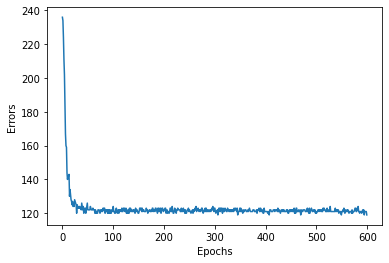

In [20]:
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Errors')

# Show the Accuracy

In [21]:
correctly, wrong = 0, 0
for inputs, target in zip(X_test, y_test):
    output = prediction(inputs, weights)
    if output >= 0.5 and target == 0:
        wrong += 1
    elif output < 0.5 and target == 1:
        wrong += 1
    else:
        correctly += 1

([<matplotlib.patches.Wedge at 0x7f5eaccdc9b0>,
 [Text(-0.8536374259659784, 0.6937601494682287, 'correctly (209)'),
  Text(0.8536373934887208, -0.6937601894298799, 'wrong (58)')])

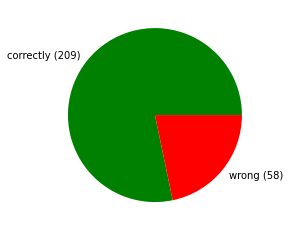

In [22]:
plt.pie([correctly, wrong], 
        labels=['correctly ({})'.format(correctly), 'wrong ({})'.format(wrong)],
        colors=['green', 'red'])

# Simplify The Test Dataset

In [23]:
test_data = test_data[['PassengerId', 'Pclass', 'Sex', 'Parch', 'SibSp']]
test_data['Sex'] = test_data['Sex'].apply(lambda x: 0 if x == 'female' else 1)

# initially We imagine Everybody Survived

In [24]:
test_data['Survived'] = 1
test_data.head()

,PassengerId,Pclass,Sex,Parch,SibSp,Survived
0,892,3,1,0,0,1
1,893,3,0,0,1,1
2,894,2,1,0,0,1
3,895,3,1,0,0,1
4,896,3,0,1,1,1


# Make The Final pediction on Test data

In [25]:
for _, row in test_data.iterrows():
    index = row['PassengerId']
    inputs = np.array([row[['Pclass', 'Sex', 'Parch', 'SibSp']].values])
    inputs = np.insert(inputs,0,1,axis=1) # Bias
    pred = prediction(inputs, weights)
    if pred < 0.5:
        row['Survived'] = 0

# Export as Csv file

In [26]:
test_data.to_csv('/home/rayhan/Desktop/Machine_Learning/data/submission.csv', columns=['PassengerId', 'Survived'], index=False)